## 🧠 Train Brain Tumor Model from BT Dataset

In [2]:
# Step 1: Upload and Extract Dataset
from google.colab import files
import zipfile
import os

uploaded = files.upload()  # Upload BT dataset.zip

with zipfile.ZipFile('BT dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('bt_dataset')

# Check folder structure
os.listdir('bt_dataset')


Saving BT dataset.zip to BT dataset (1).zip


['Testing', 'Training']

In [4]:
# Step 2: Set Up Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/bt_dataset/Testing'
test_dir = '/content/bt_dataset/Training'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

                                             # Step 2: Set Up Image Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Update paths to reflect the actual location of the dataset
train_dir = 'bt_dataset/Training' # Assuming 'Training' is the actual folder name
test_dir = 'bt_dataset/Testing'   # Assuming 'Testing' is the actual folder name

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')


Found 1311 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [5]:
# Step 3: Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Step 4: Train the Model
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.5749 - loss: 1.3401 - val_accuracy: 0.8124 - val_loss: 0.4773
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - accuracy: 0.8736 - loss: 0.3464 - val_accuracy: 0.8886 - val_loss: 0.2830
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.9287 - loss: 0.2090 - val_accuracy: 0.9184 - val_loss: 0.2080
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9402 - loss: 0.1539 - val_accuracy: 0.9375 - val_loss: 0.1759
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 514s 3s/step - accuracy: 0.9629 - loss: 0.1117 - val_accuracy: 0.9375 - val_loss: 0.1642
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 546s 3s/step - accuracy: 0.9725 - loss: 0.0828 - val_accuracy: 0.9413 - val_loss: 0.1807
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.9809 - loss: 0.0617 - val_accuracy: 0.9481 - val_loss: 0.1946
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 502s 3s/step - accuracy: 0.9848 - loss: 0.0461 - val_accu

In [8]:
# Step 5: Save the Model
model.save("tumor_model.h5")
print("✅ Model saved as tumor_model.h5")


✅ Model saved as tumor_model.h5


# 🧑‍⚕️ Unified Disease Prediction System
This Colab notebook allows you to predict **Brain Tumor**, **Diabetes**, and **Heart Disease** in one place using pre-trained models.

## 📈 Training Accuracy and Loss Graphs

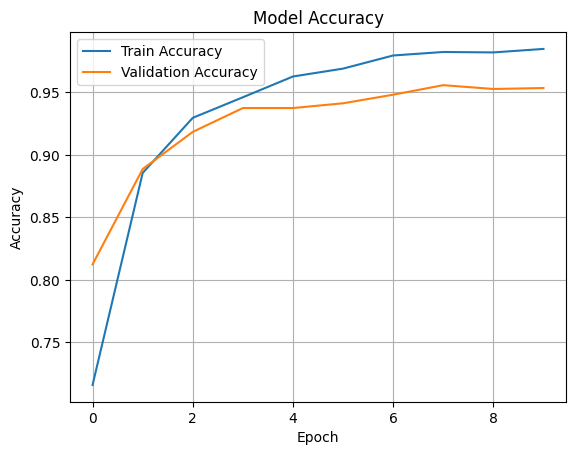

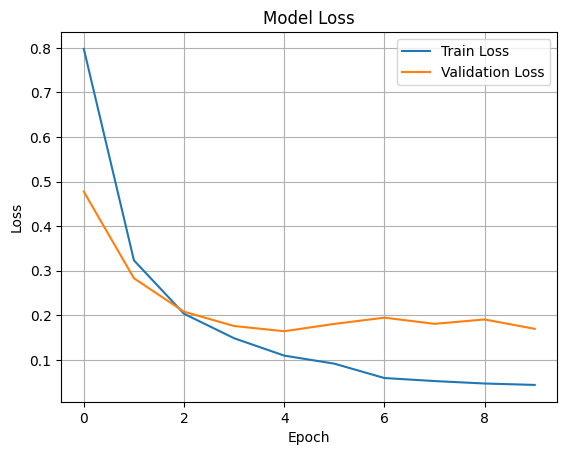

In [9]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## 📊 Confusion Matrix for Brain Tumor Model

41/41 ━━━━━━━━━━━━━━━━━━━━ 31s 731ms/step


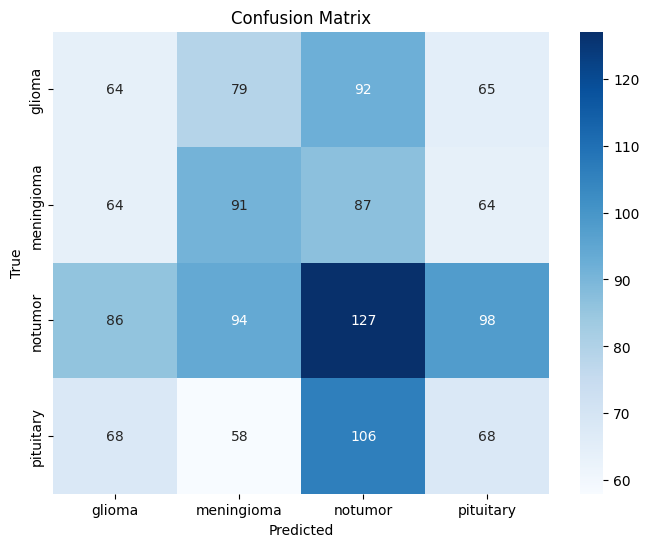

              precision    recall  f1-score   support

      glioma       0.23      0.21      0.22       300
  meningioma       0.28      0.30      0.29       306
     notumor       0.31      0.31      0.31       405
   pituitary       0.23      0.23      0.23       300

    accuracy                           0.27      1311
   macro avg       0.26      0.26      0.26      1311
weighted avg       0.27      0.27      0.27      1311



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict test data
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys())))


In [11]:
# 📦 Install required packages
!pip install -q opencv-python scikit-learn tensorflow
import cv2
import numpy as np
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from IPython.display import Image, display


In [12]:
# 📂 Load pre-trained models

# Load brain tumor model (.h5)
tumor_model = load_model('tumor_model.h5')  # Replace with actual file if available

# Load diabetes and heart disease models
with open('diabetes_model.sav', 'rb') as file:
    diabetes_model = pickle.load(file)

with open('heart_disease_model.sav', 'rb') as file:
    heart_disease_model = pickle.load(file)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## 🧠 Brain Tumor Prediction

In [14]:
from google.colab import files
uploaded = files.upload()

# Pick the first uploaded file
for fn in uploaded:
    image_path = fn
    break

# Load and preprocess image
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img_resized / 255.0, axis=0)

# Predict
prediction = tumor_model.predict(img_array)[0]
result = np.argmax(prediction)

label_map = {0: "No Tumor", 1: "Pituitary Tumor", 2: "Meningioma Tumor", 3: "Glioma Tumor"}
print("🔍 Prediction:", label_map.get(result, "Unknown"))


Saving Te-gl_0010.jpg to Te-gl_0010.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
🔍 Prediction: No Tumor


## 💉 Diabetes Prediction

In [15]:
# Enter test input manually
input_data = [2, 120, 70, 30, 80, 25.5, 0.5, 30]  # Example input
input_np = np.array(input_data).reshape(1, -1)

prediction = diabetes_model.predict(input_np)[0]
print("🔍 Result:", "Diabetic" if prediction == 1 else "Not Diabetic")


🔍 Result: Not Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## ❤️ Heart Disease Prediction

In [16]:
# Sample input: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
input_data = [60, 1, 0, 140, 240, 0, 1, 160, 0, 1.8, 1, 0, 2]
input_np = np.array(input_data).reshape(1, -1)

prediction = heart_disease_model.predict(input_np)[0]
print("🔍 Result:", "Heart Disease" if prediction == 1 else "No Heart Disease")


🔍 Result: Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 📊 Optional: Evaluate Model Accuracy

In [17]:
# Load datasets
df_diabetes = pd.read_csv('diabetes.csv')
df_heart = pd.read_csv('heart.csv')

# Accuracy for diabetes model
X_diab = df_diabetes.drop('Outcome', axis=1)
y_diab = df_diabetes['Outcome']
acc_diab = diabetes_model.score(X_diab, y_diab)

# Accuracy for heart model
X_heart = df_heart.drop('target', axis=1)
y_heart = df_heart['target']
acc_heart = heart_disease_model.score(X_heart, y_heart)

print(f"📈 Diabetes Model Accuracy: {acc_diab:.2f}")
print(f"📈 Heart Disease Model Accuracy: {acc_heart:.2f}")


📈 Diabetes Model Accuracy: 0.78
📈 Heart Disease Model Accuracy: 0.84
